In [1725]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections 
from scipy import stats

In [1808]:
df.head(20)

,thread_subject,username,page_name,date
0,User contributions showing Q##,Yair rand,WikidataContactthedevelopmentteamArchive201210...,201210
1,User contributions showing Q##,Lydia Pintscher (WMDE),WikidataContactthedevelopmentteamArchive201210...,201210
2,User contributions showing Q##,Humanzz,WikidataContactthedevelopmentteamArchive201210...,201210
3,User contributions showing Q##,Ironholds,WikidataContactthedevelopmentteamArchive201210...,201210
4,"""Add"" bug",Ironholds,WikidataContactthedevelopmentteamArchive201210...,201210
5,"""Add"" bug",Wittylama,WikidataContactthedevelopmentteamArchive201210...,201210
6,"""Add"" bug",Denny,WikidataContactthedevelopmentteamArchive201210...,201210
7,"""Add"" bug",Wizardist,WikidataContactthedevelopmentteamArchive201210...,201210
8,Initial Language,Wittylama,WikidataContactthedevelopmentteamArchive201210...,201210
9,Initial Language,Denny,WikidataContactthedevelopmentteamArchive201210...,201210


What data structures did you choose to represent this network? How do you keep additional information that cannot be directly encoded as nodes and edges?

What was your algorithmic approach for building the network?

What was the cost (in time, with respect to the input size, etc.) of building the network?

In [1727]:
df = pd.read_csv("REPORT_A_TECHNICAL_PROBLEM.csv")

pd.set_option('display.max_colwidth',None)

# Now when you call df['page_name'], it should display the full content of the column


In [1728]:
df['page_name'].str[:-11].value_counts()

# We see that basically all of them belong to the first cat. can ignore 
# the differentiations for now. maybe look into it when detecting trolls
# Just the page name changes over time but what it really does it keep the DATE MONTH OF AN ARCHIVE 

WikidataContactthedevelopmentteamArchive                         5128
WikidataContactthedevelopmentteamQueryServiceandsearchArchive     111
WikidataReportatechnicalproblemArchive                             46
WikidataReportatechnicalp                                          10
WikidataReportatechnicalproblemWDQSand                              4
Name: page_name, dtype: int64

In [1729]:
# group the data by thread_subject
gr = df.groupby('thread_subject')
count = 0
total_threads = len(gr)

# iterate through each group and check for multiple page_name values
for thread_subject, group in gr:
    page_names = group['page_name'].unique()
    if len(page_names) > 1:
        count += 1

print(f"Percentage of threads belonging to more than 1 page_name is: {count/total_threads * 100:.2f}%")


Percentage of threads belonging to more than 1 page_name is: 1.63%


In [1730]:
# Henceforth irrelevant 
total_unique_threads

1967

In [1731]:
## the file is in Year  / Month format.... no "day"
## https://www.wikidata.org/wiki/Wikidata:Report_a_technical_problem
## We create "date" column extracted from the "page_name" strings

import re

df['date'] = df['page_name'].apply(lambda x: re.findall('\d{6}', x)[0] if re.findall('\d{6}', x) else None)
df['date'].value_counts().head(20)

201303    234
201211    217
201302    156
201508    100
201308     98
201309     96
201608     95
201305     92
201410     91
201304     91
201911     80
201511     77
201606     76
201408     73
201512     72
201505     72
201409     71
201506     70
201210     69
201403     65
Name: date, dtype: int64

In [1732]:
df['date'].isna().sum()

14

In [1733]:
null_date_rows = df[df['date'].isnull()].index
null_date_rows

Int64Index([5285, 5286, 5287, 5288, 5289, 5290, 5291, 5292, 5293, 5294, 5295,
            5296, 5297, 5298],
           dtype='int64')

In [1734]:
df.tail(20)

,thread_subject,username,page_name,date
5279,Property Q66372688 is not available as property,Pitke,WikidataReportatechnicalproblemArchive202110.json,202110
5280,Property Q66372688 is not available as property,Matěj Suchánek,WikidataReportatechnicalproblemArchive202110.json,202110
5281,No links on Polish disambiguation page,Tagishsimon,WikidataReportatechnicalproblemArchive202111.json,202111
5282,No links on Polish disambiguation page,Kamdenek,WikidataReportatechnicalproblemArchive202111.json,202111
5283,Repeted Spanish French and German names,Lojwe,WikidataReportatechnicalproblemArchive202111.json,202111
5284,Repeted Spanish French and German names,Tagishsimon,WikidataReportatechnicalproblemArchive202111.json,202111
5285,Where to find your SPARQL query service in Git/Svn/etc.,Tagishsimon,WikidataReportatechnicalproblem.json,None
5286,Where to find your SPARQL query service in Git/Svn/etc.,DanizenAtWork,WikidataReportatechnicalproblem.json,None
5287,Where to find your SPARQL query service in Git/Svn/etc.,Lucas Werkmeister (WMDE),WikidataReportatechnicalproblem.json,None
5288,Entity Q28865 is not visible in SPARQL query results,Lucas Werkmeister (WMDE),WikidataReportatechnicalproblem.json,None


In [1735]:
### The last 14 pages dont have a date yet cause its most recent infomation (not archived) so we add 2012 12. 

df['date'].fillna(202112, inplace=True)
df['date'] = df['date'].astype(int)

In [1736]:
df['date'].value_counts()

201303    234
201211    217
201302    156
201508    100
201308     98
201309     96
201608     95
201305     92
201410     91
201304     91
201911     80
201511     77
201606     76
201408     73
201512     72
201505     72
201409     71
201506     70
201210     69
201403     65
201312     64
201301     63
201412     59
202011     59
201607     58
201603     58
201404     57
202009     56
201605     56
201601     55
202003     55
201612     54
201604     54
201503     53
202012     53
201401     51
201311     50
201602     49
201310     48
201407     47
201507     47
201411     47
201509     47
201510     46
201907     46
201306     45
202004     45
201611     45
201504     44
201502     43
201804     43
201901     42
202007     41
201610     41
201307     41
201805     40
201609     40
202104     40
201212     39
202006     39
201712     39
201402     38
202002     37
201908     37
202107     37
202005     37
201703     37
201801     37
201709     36
201904     36
201910     35
201808

In [1737]:
################### DATE DONE ######################

In [1738]:
num_unique_usernames = df['username'].nunique()
num_unique_pages = df['page_name'].nunique()
num_unique_threads = df['thread_subject'].nunique()

print(f"Number of unique usernames: {num_unique_usernames}")
print(f"Number of unique pages: {num_unique_pages}")
print(f"Number of unique threads: {num_unique_threads}")


Number of unique usernames: 696
Number of unique pages: 129
Number of unique threads: 1967


In [1739]:
# Group the data by page name and count the number of unique thread subjects for each group
num_thread_subjects = df.groupby('page_name')['thread_subject'].nunique()

# Count the number of pages with more than 1 thread subject
count = (num_thread_subjects > 1).sum()

# Compute the percentage of pages with more than 1 thread
percentage = count / num_unique_pages

print(f"Number of pages with more than 1 thread: {count}")
print(f"Percentage of pages with more than 1 thread is: {percentage}") 


Number of pages with more than 1 thread: 125
Percentage of pages with more than 1 thread is: 0.9689922480620154


In [1740]:
# group the data by thread_subject

groups = df.groupby('thread_subject')
count = 0
total_threads = len(groups)
multi_page_threads = []

# iterate through each group and check for multiple page_name values
for thread_subject, group in groups:
    page_names = group['page_name'].unique()
    if len(page_names) > 1:
        count += 1
        multi_page_threads.append(thread_subject)
        
## total 32 

threads_not_in_1_page = len(multi_page_threads)
total_unique_threads = df['thread_subject'].nunique()
percentage = threads_not_in_1_page/total_unique_threads

print(f"Percentage of threads belonging to more than 1 page_name is: {percentage:.2f}%")
print("Henceforth irrelevant")
print("We can assume that a thread belongs to 1 page ")

Percentage of threads belonging to more than 1 page_name is: 0.02%
Henceforth irrelevant
We can assume that a thread belongs to 1 page 


### Graphing 

In [1741]:
# Weighted Graph Creation 
    
# Create the weighted graph
G_weighted = nx.Graph()
user_ids = {}
grouped = df.groupby(["page_name", "thread_subject"])
for (page_name, thread_subject), group in grouped:
    if len(group['page_name'].unique()) == 1:
        usernames = group["username"].unique()
        for u in usernames:
            if u not in user_ids:
                user_ids[u] = len(user_ids)
                G_weighted.add_node(user_ids[u], username=u)
                    
        for i, u1 in enumerate(usernames):
            for j, u2 in enumerate(usernames):
                if i < j:
                    u1_id = user_ids[u1]
                    u2_id = user_ids[u2]
                    if G_weighted.has_edge(u1_id, u2_id):
                        G_weighted[u1_id][u2_id]['weight'] += 1
                    else:
                        G_weighted.add_edge(u1_id, u2_id, weight=1)
                            
# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_matrix(G_weighted)
n_nodes = len(user_ids)
adj_matrix = np.zeros((n_nodes, n_nodes), dtype=int)
for u, v in G_weighted.edges:
    i, j = u, v
    weight = G_weighted[u][v]['weight']
    adj_matrix[i, j] = weight
    adj_matrix[j, i] = weight

# Create a DataFrame with usernames as row and column indexes
id_to_username = {v: k for k, v in user_ids.items()}
adj_df_weighted = pd.DataFrame(adj_matrix, index=id_to_username.values(), columns=id_to_username.values())

In [1742]:
from itertools import islice

# Get the first 10 items from the dictionary
first_10_items = islice(id_to_username.items(), 10)

# Print each item
for user_id, username in first_10_items:
    print(user_id, username)

0 Ironholds
1 Wittylama
2 Denny
3 Wizardist
4 PiRSquared17
5 Hydriz
6 Yerpo
7 Lydia Pintscher (WMDE)
8 JAn Dudík
9 Svebert


In [1743]:
adj_df_weighted.head(10)

,Ironholds,Wittylama,Denny,Wizardist,PiRSquared17,Hydriz,Yerpo,Lydia Pintscher (WMDE),JAn Dudík,Svebert,...,Pamputt,Gameposo,CaribDigita,Peaceray,Pitke,Prosperosity,LiberatorG,Kamdenek,Lojwe,Arjunaraoc
Ironholds,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Wittylama,1,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Denny,1,2,0,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
Wizardist,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PiRSquared17,0,0,0,0,0,1,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0
Hydriz,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Yerpo,0,0,0,0,1,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
Lydia Pintscher (WMDE),1,0,3,0,6,1,2,0,16,3,...,0,0,0,1,0,0,0,0,0,0
JAn Dudík,0,0,0,0,1,1,1,16,0,0,...,0,0,0,0,0,0,0,0,0,0
Svebert,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1744]:
# we want to see the person that made the most comments : 
df['username'].value_counts().head(5)

Lydia Pintscher (WMDE)    907
Lea Lacroix (WMDE)        281
Jura1                     267
Matěj Suchánek            130
Hoo man                   109
Name: username, dtype: int64

In [1745]:
# Calculate the degree of each node
degree_dict = dict(G_weighted.degree())

# Get the 5 nodes with the highest degree
top_5_nodes = sorted(degree_dict, key=lambda x: degree_dict[x], reverse=True)[:5]

# Print the top 5 nodes
print("Nodes with the most edges:")
for node in top_5_nodes:
    username = G_weighted.nodes[node]['username']
    print(f"{username}: {degree_dict[node]} edges")

Nodes with the most edges:
Lydia Pintscher (WMDE): 352 edges
Lea Lacroix (WMDE): 185 edges
Jura1: 131 edges
Matěj Suchánek: 105 edges
Hoo man: 90 edges


In [1746]:
# Calculate the betweenness centrality of each node
bc_dict = nx.betweenness_centrality(G_weighted, weight='weight')

# Get the 5 nodes with the highest betweenness centrality
top_5_nodes = sorted(bc_dict, key=lambda x: bc_dict[x], reverse=True)[:5]

# Print the top 5 nodes and their betweenness centralities
print("Nodes with the highest betweenness centrality:")
for node in top_5_nodes:
    username = G_weighted.nodes[node]['username']
    bc = bc_dict[node]
    print(f"{username}: {bc}")

Nodes with the highest betweenness centrality:
Lydia Pintscher (WMDE): 0.2973713251902343
Lea Lacroix (WMDE): 0.15528344222210247
Matěj Suchánek: 0.06112859641876335
Stryn: 0.057834624855486134
Mohammed Sadat (WMDE): 0.053917369283906606


In [1747]:
# we want to see the person that made the most comments : 
df['username'].value_counts().head(5)

Lydia Pintscher (WMDE)    907
Lea Lacroix (WMDE)        281
Jura1                     267
Matěj Suchánek            130
Hoo man                   109
Name: username, dtype: int64

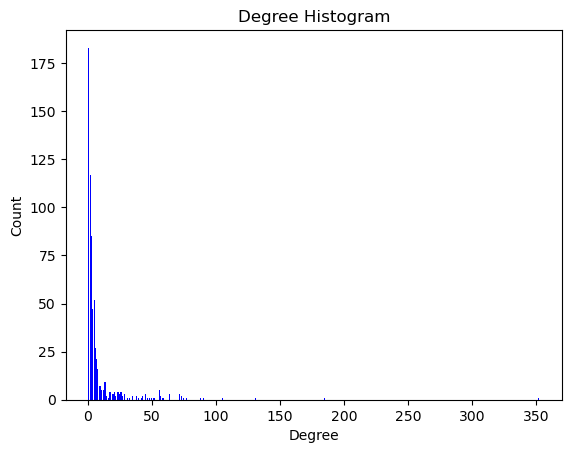

In [1748]:
degrees = [val for (node, val) in G_weighted.degree()]
degrees
largest = max(nx.connected_components(G_weighted), key=len)
component = G_weighted.subgraph(largest) 
degree_sequence = [d for n, d in component.degree()]
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width = 0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

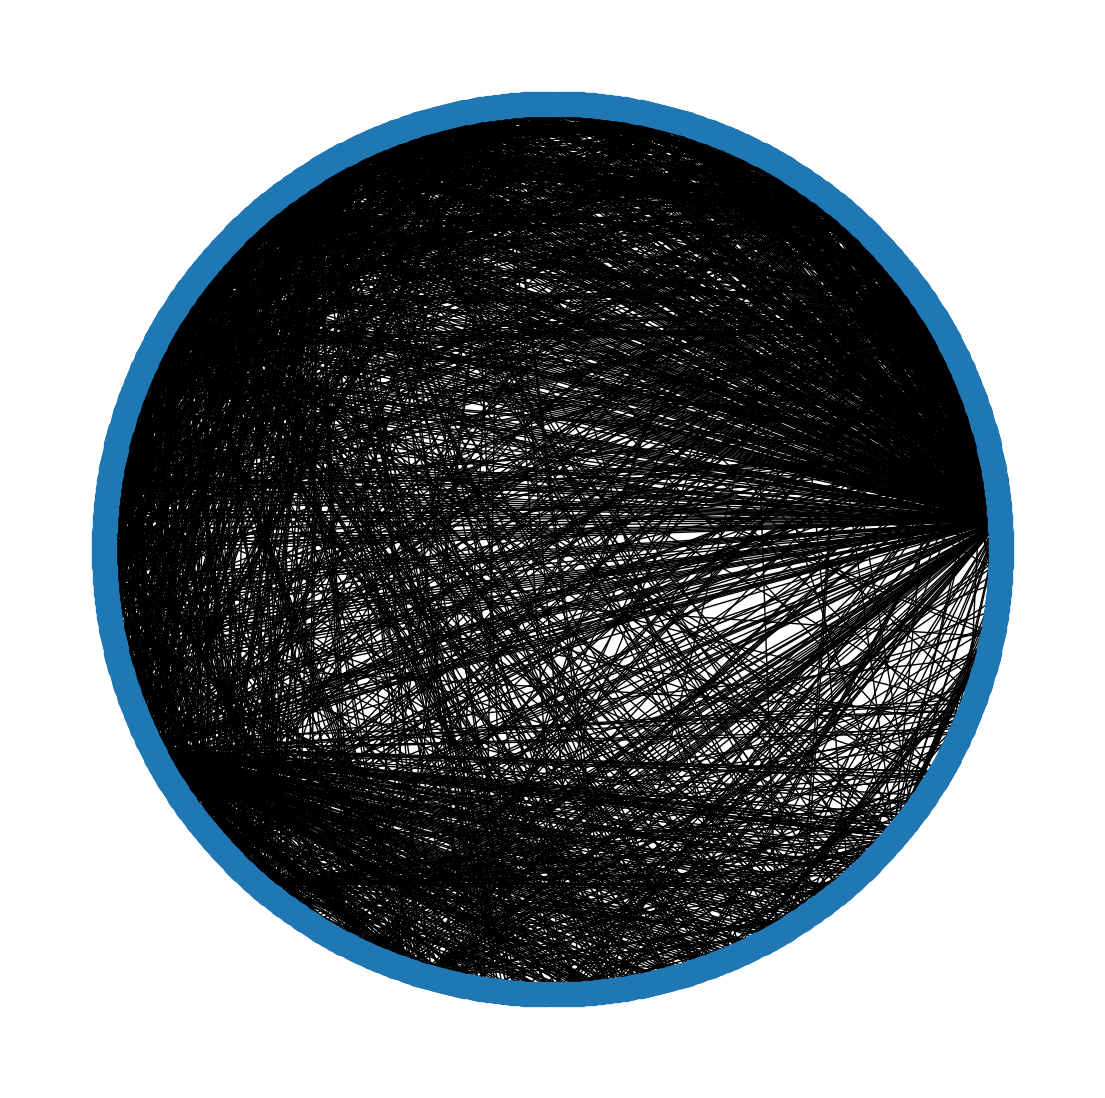

In [1749]:
### Big graph 

fig, ax = plt.subplots(figsize=(14,14))
nx.draw(G_weighted, pos=nx.circular_layout(G_weighted), with_labels=False)

In [1750]:
def draw_subgraph(G, node_list):
    # Create the subgraph
    subgraph = G.subgraph(node_list)
    
    # Label the nodes with corresponding usernames
    node_labels = {id_: name for name, id_ in user_ids.items() if id_ in subgraph.nodes()}

    # Create the layout and draw the graph
    pos = nx.spring_layout(subgraph, k=None, iterations=10)
    nx.draw_networkx_nodes(subgraph, pos, node_color="skyblue", node_size=1100)
    nx.draw_networkx_edges(subgraph, pos, edge_color="grey")
    nx.draw_networkx_labels(subgraph, pos, labels=node_labels, font_color="black")
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color="orange")
    plt.axis("off")
    plt.show()

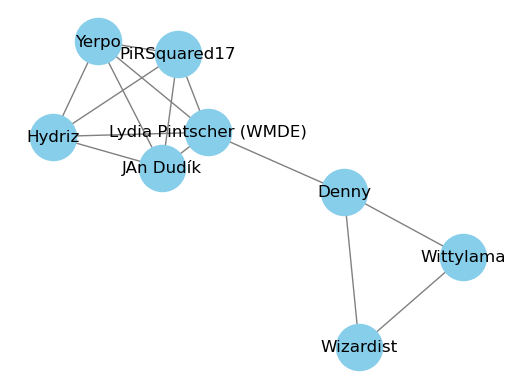

In [1751]:
draw_subgraph(G_weighted,[1, 2, 3, 4, 5,6,7,8])

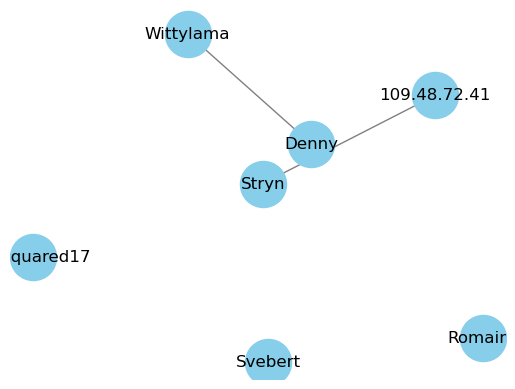

In [1752]:
draw_subgraph(G,[1, 2,4,9 ,11, 12, 13])

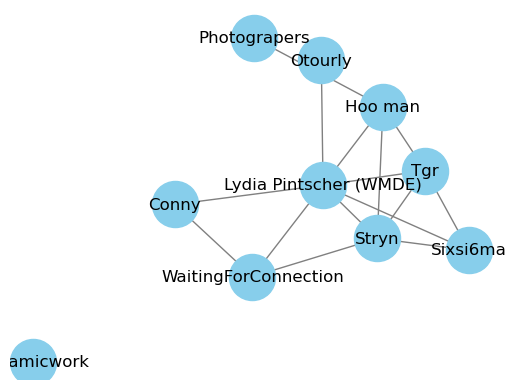

In [1753]:
draw_subgraph(G,[13,41,65,66,68,69, 70, 71, 82,7])

### Comparison of Metrics to randomly generated graphs

In [1754]:
## Endros renyi 
## Watts_strogatz_graph
## Barabasi_albert_graph

In [1755]:
random_graphs = []

sub__weighted_largest = max(nx.connected_components(G_weighted), key=len)
sub__weighted_largest = G_weighted.subgraph(sub__weighted_largest).copy()

random_graphs.append(("WIKIDATA graph", sub__weighted_largest))

# Erdős-Rényi random graph
rg1 = nx.gnp_random_graph(G.number_of_nodes(), G.number_of_edges() / (G.number_of_nodes() * (G.number_of_nodes() - 1) / 2))
rg1_largest = max(nx.connected_components(rg1), key=len)
rg1_largest = rg1.subgraph(rg1_largest).copy()

random_graphs.append(("Erdős-Rényi Random Graph", rg1_largest))

# Barabási-Albert random graph
rg2 = nx.barabasi_albert_graph(G.number_of_nodes(), G.number_of_edges() // G.number_of_nodes())
rg2_largest = max(nx.connected_components(rg2), key=len)
rg2_largest = rg2.subgraph(rg2_largest).copy()

random_graphs.append(("Barabási-Albert Random Graph", rg2_largest))

# Watts-Strogatz random graph
rg3 = nx.connected_watts_strogatz_graph(G.number_of_nodes(), G.number_of_edges() // G.number_of_nodes(), 0.1)
rg3_largest = max(nx.connected_components(rg3), key=len)
rg3_largest = rg3.subgraph(rg3_largest).copy()

random_graphs.append(("Watts-Strogatz Random Graph", rg3_largest))

# compare the metrics for the random graphs with the metrics of the original network
for (name, rg) in random_graphs:
    print(" ")
    print(f"{name} :")
    print(" ")
    print("Number of nodes: {}".format(rg.number_of_nodes()))
    print("Number of edges: {}".format(rg.number_of_edges()))
    print("Average path length: {}".format(nx.average_shortest_path_length(rg)))
    print("Average clustering coefficient: {}".format(nx.average_clustering(rg)))
    print("Graph diameter: {}".format(nx.diameter(rg)))

 
WIKIDATA graph :
 
Number of nodes: 676
Number of edges: 2958
Average path length: 2.6567521367521367
Average clustering coefficient: 0.5658780677469266
Graph diameter: 6
 
Erdős-Rényi Random Graph :
 
Number of nodes: 696
Number of edges: 2990
Average path length: 3.281224675432068
Average clustering coefficient: 0.012347827028354403
Graph diameter: 6
 
Barabási-Albert Random Graph :
 
Number of nodes: 696
Number of edges: 2768
Average path length: 3.035293144794509
Average clustering coefficient: 0.05167838366937739
Graph diameter: 5
 
Watts-Strogatz Random Graph :
 
Number of nodes: 696
Number of edges: 1392
Average path length: 7.885003721161002
Average clustering coefficient: 0.35640394088669985
Graph diameter: 15


### TROLL TRACK AND TRACE 

In [1756]:
### To detect a troll, should we look at an unusual number of comments under a thread or page? 

In [1757]:
### Basically the number of comments left under one thread is always 1 
### Proof that we should only look at number of comments under a page as 
### Therefore we will only take into account the number of comments under a thread 

unique_usernames = df['username'].unique()
print(f"Average number of comments left under a thread is : ")

for username in unique_usernames:
    n_threads, n_comments = get_user_thread_comment_counts(username)
    avg = n_comments / n_threads
    
    
    print(f"Average : {avg} for {username}")


Average number of comments left under a thread is : 
Average : 1.0 for Yair rand
Average : 1.0213963963963963 for Lydia Pintscher (WMDE)
Average : 1.0 for Humanzz
Average : 1.0 for Ironholds
Average : 1.0 for Wittylama
Average : 1.0 for Denny
Average : 1.0 for Wizardist
Average : 1.0 for 90.176.233.122
Average : 1.0 for Michiel1972
Average : 1.125 for PiRSquared17
Average : 1.0 for Vituzzu
Average : 1.0 for Hydriz
Average : 1.0 for Yerpo
Average : 1.0 for JAn Dudík
Average : 1.0 for 109.48.72.41
Average : 1.0 for MF-Warburg
Average : 1.0 for Saint Johann
Average : 1.0 for Pilettes
Average : 1.0 for Svebert
Average : 1.0 for Ijon
Average : 1.0 for Ltrlg
Average : 1.0 for This, that and the other
Average : 1.0 for Romaine
Average : 1.0 for Hazard-SJ
Average : 1.0 for Stryn
Average : 1.0178571428571428 for Jeblad
Average : 1.0 for Raoli
Average : 1.0 for Matthiasb
Average : 1.0 for Fnielsen
Average : 1.0 for Daniel Kinzler (WMDE)
Average : 1.0 for Helder.wiki
Average : 1.0 for Soulkeeper


### Most argumentative Pages 

In [1758]:
def get_most_argumentative_pages(df):
    # Group the DataFrame by page_name and username, then count the comments
    comments = df.groupby(['date', 'username'])['username'].count()

    # Count the total number of comments per page and the number of unique usernames per page
    total_comments = comments.groupby('date').sum()
    unique_usernames = comments.groupby('date').nunique()

    # Calculate the ratio of total comments to unique usernames for each page
    ratios = total_comments / unique_usernames

    # Sort the pages by the ratio of comments to unique usernames, and return the results as a dictionary
    return ratios.sort_values(ascending=False).to_dict()

page_ratios = get_most_argumentative_pages(df)
top_10 = list(page_ratios.items())[:10]


print("Highest ratios : ")

for page, ratio in top_10:
    print(f"{page}: {ratio}")

Highest ratios : 
201302: 22.285714285714285
201303: 19.5
201211: 18.083333333333332
201409: 17.75
201304: 15.166666666666666
201408: 14.6
201508: 14.285714285714286
202009: 14.0
201308: 14.0
201506: 14.0


In [1759]:
### This function returns the users that made the most comments for the specific date/page 
### Helpful in detecting potential trolls and users affected by trolling  

def get_top_commenters(df, date):
    # Filter the dataframe by the date and group by username
    date_filter = df['date'] == date
    filtered_df = df[date_filter]
    grouped = filtered_df.groupby("username")

    # Compute the number of comments for each username and sort in descending order
    comment_counts = grouped.size().sort_values(ascending=False)

    # Return a dictionary with the top 10 commenters and their comment counts
    return comment_counts.head(10).to_dict()

### Most Argumentative People 

In [1760]:
# If there is a page/month when the user did comment something
# function returns the value for 

def avg_comments_by_user_per_month(username):
    user_df = df[df['username'] == username]
    unique_page_name = user_df['page_name'].unique()
    total_comments = len(user_df)
    avg_comments = total_comments / len(unique_page_name)
    return avg_comments

In [1761]:
### # Users with the highest ratio GIVEN there is more than 1 date in which they commented 

def get_avg_comments_by_user_more_than_one_day(df):
    data = []
    for username in df['username'].unique():
        num_dates = len(df[df['username'] == username]['date'].unique())
        if num_dates > 1:
            avg_comments = avg_comments_by_user_per_month(username)
            data.append({'username': username, 'avg_comments': avg_comments, 'num_dates': num_dates})
    result = pd.DataFrame(data).sort_values(by='avg_comments', ascending=False)
    return result

### Same function but includes all the users, later used in a function seeking for anomalies 

def get_avg_comments_by_user(df):
    usernames = df['username'].unique()
    data = []
    for username in usernames:
        avg_comments = avg_comments_by_user_per_month(username)
        data.append({'username': username, 'avg_comments': avg_comments})
    result = pd.DataFrame(data).sort_values(by='avg_comments', ascending=False)
    return result


### Randomly choosing two editors, but the choice does not have to be completely random 

In [1762]:
### We can look at the users that have a high ratio of comments to unique dates when they were active 

In [1763]:
# Users with the highest ratio GIVEN there is more than 1 date in which they commented 

pd.reset_option('display.max_colwidth')
potential_trolls = get_avg_comments_by_user_more_than_one_day(df)
potential_trolls.head(20)

,username,avg_comments,num_dates
1,Lydia Pintscher (WMDE),10.306818,88
8,109.48.72.41,6.500000,2
193,Lea Lacroix (WMDE),4.844828,53
18,Raoli,4.500000,2
253,Mohammed Sadat (WMDE),3.928571,13
60,Lavallen,3.733333,15
95,Byrial,3.600000,5
37,Duesentrieb,3.600000,5
31,WaitingForConnection,3.500000,2
74,Reza1615,3.500000,2


### STEP 1 - Choose Editor to check

In [1764]:
Editor1 = "Hoo man"

### STEP 2 - Check for unsually large activity on a given page/date

In [1765]:
### This function shows how many comments did a user leave on a given page/date (equivalent)

def get_comments_by_date(username, df=df):
    
    # Create a filtered DataFrame containing only the user's comments
    user_df = df[df['username'] == username]

    # Group the filtered DataFrame by date and count the comments
    comments_by_date = user_df.groupby('date')['thread_subject'].count()

    # Convert the result to a DataFrame and return it
    df_comments_by_date = pd.DataFrame(comments_by_date)
    df_comments_by_date.columns = ['comment_count']
    return df_comments_by_date

In [1766]:
def checkd(username, df):
    comments_by_date = get_comments_by_date(username, df)

    values = np.array(list(comments_by_date['comment_count']))
    mean = np.mean(values)
    std_dev = np.std(values)

    if std_dev <= 0.1:
        print(f"No suspicious patterns found for user {username}")
        return

    z_scores = (values - mean) / std_dev
    threshold = 2

    data = {
        'dates': list(comments_by_date.index),
        'num_comments': list(comments_by_date['comment_count']),
        'z_score': z_scores
    }

    df_check = pd.DataFrame(data)

    df_check['prob'] = 1 - norm.cdf(df_check['z_score'])
    df_check['prob'] = np.around(df_check['prob'], decimals=4)

    anomalies = df_check[df_check['z_score'] > threshold]
    result = anomalies[['dates', 'num_comments', 'prob']]

    return result

In [1767]:
get_comments_by_date(Editor1,df=df).head(10)

,comment_count
date,
201211,12
201303,1
201307,2
201308,1
201401,1
201403,1
201404,1
201407,1
201410,2


In [1768]:
checkd(Editor1,df)

,dates,num_comments,prob
0,201211,12,0.0001
23,201605,10,0.0020


In [1769]:
# "Hoo man"  spikes
spike1 = 201211
spike2 = 201605

### STEP 3 - We Detect which people where the top commentators in the pages/months of spikes

In [1770]:
### WE use this function that will tell

def get_top_neighbors(df, username, start_date, end_date, k=10):
    # Filter the dataframe by the date range and convert 'date' column to integer
    date_filter = (df['date'].astype(int) >= start_date) & (df['date'].astype(int) <= end_date)
    filtered_df = df[date_filter]

    # Create the weighted graph
    G_weighted = nx.Graph()
    user_ids = {}
    grouped = filtered_df.groupby(["page_name", "thread_subject"])
    for (page_name, thread_subject), group in grouped:
        if len(group['page_name'].unique()) == 1:
            usernames = group["username"].unique()
            for u in usernames:
                if u not in user_ids:
                    user_ids[u] = len(user_ids)
                    G_weighted.add_node(user_ids[u], username=u)
            for i, u1 in enumerate(usernames):
                for j, u2 in enumerate(usernames):
                    if i < j:
                        u1_id = user_ids[u1]
                        u2_id = user_ids[u2]
                        if G_weighted.has_edge(u1_id, u2_id):
                            G_weighted[u1_id][u2_id]['weight'] += 1
                        else:
                            G_weighted.add_edge(u1_id, u2_id, weight=1)
    # Convert the graph to an adjacency matrix
    adj_matrix = nx.to_numpy_matrix(G_weighted)
    n_nodes = len(user_ids)
    adj_matrix = np.zeros((n_nodes, n_nodes), dtype=int)
    for u, v in G_weighted.edges:
        i, j = u, v
        weight = G_weighted[u][v]['weight']
        adj_matrix[i, j] = weight
        adj_matrix[j, i] = weight
    # Create a DataFrame with usernames as row and column indexes
    id_to_username = {v: k for k, v in user_ids.items()}
    adj_df_weighted = pd.DataFrame(adj_matrix, index=id_to_username.values(), columns=id_to_username.values())
    # Get the top neighbors of the user
    top_neighbors = adj_df_weighted.loc[username].sort_values(ascending=False).iloc[1:k+1]
    # Get the total number of edges connected to the username node
    total_edges = adj_df_weighted.loc[username].sum()
    # Convert the result to a dictionary and return
    print(f" Between the time {start_date} and {end_date} : ")
    print(" ")
    print(f" The {username} top neighbours are : ")
    print(" ")
    print(top_neighbors.to_dict())

### Compare the top neighbours before the spike and the period after 

### Spike1 

In [1771]:
get_top_neighbors(df, Editor1, spike1-1, spike1, k=10)

 Between the time 201210 and 201211 : 
 
 The Hoo man top neighbours are : 
 
{'Photograpers': 2, 'Raoli': 2, 'Helder.wiki': 2, 'Arkanosis': 2, 'Dalton2': 1, 'MF-Warburg': 1, 'Stryn': 1, 'Yair rand': 1, 'Justincheng12345': 1, 'Tgr': 1}


In [1772]:
get_top_neighbors(df, Editor1, spike1, spike1+1, k=10)

 Between the time 201211 and 201212 : 
 
 The Hoo man top neighbours are : 
 
{'Photograpers': 2, 'Helder.wiki': 2, 'Arkanosis': 2, 'Raoli': 2, 'MF-Warburg': 1, 'Justincheng12345': 1, 'Ajraddatz': 1, 'Tgr': 1, 'Stryn': 1, 'Mxn': 1}


### Spike2 

In [1773]:
get_top_neighbors(df, Editor1, spike2-1, spike2, k=10)

 Between the time 201604 and 201605 : 
 
 The Hoo man top neighbours are : 
 
{'Lydia Pintscher (WMDE)': 4, 'Laddo': 2, 'Bovlb': 2, 'TomT0m': 1, 'Termininja': 1, 'Multichill': 1, 'Pigsonthewing': 1, 'Srittau': 1, 'Matěj Suchánek': 1, 'Yair rand': 1}


In [1774]:
### Compare the top neighbours before the spike and the period after 

get_top_neighbors(df, Editor1, spike2, spike2+1, k=10)

 Between the time 201605 and 201606 : 
 
 The Hoo man top neighbours are : 
 
{'Jura1': 4, 'Molarus': 2, 'TomT0m': 2, 'Laddo': 2, 'Matěj Suchánek': 1, 'Multichill': 1, 'Bovlb': 1, 'Thryduulf': 1, 'Izno': 1, 'Pigsonthewing': 1}


### "Jura1" Affected by the second spike

In [1775]:
# NOW WE CHECK FOR "Jura1"

Editor2 = "Jura1"

In [1776]:
checkd(Editor2,df)

,dates,num_comments,prob
14,201603,9,0.0197
19,201608,9,0.0197
49,201911,10,0.0069
61,202012,9,0.0197


In [1777]:
spike1 = 201603
spike2 = 201608
spike3 = 201911
spike4 = 202012

### Spike1 Jural

In [1778]:
get_top_neighbors(df, Editor2, spike1-1, spike1, k=10)

 Between the time 201602 and 201603 : 
 
 The Jura1 top neighbours are : 
 
{'Mbch331': 4, 'Hoo man': 3, 'Smalyshev (WMF)': 2, 'MarcoAurelio': 1, 'Nikki': 1, 'Sjoerddebruin': 1, 'Jonas Kress (WMDE)': 1, 'Jeblad': 1, 'Bovlb': 1, 'Ayack': 1}


In [1779]:
get_top_neighbors(df, Editor2, spike1, spike1+1, k=10)

 Between the time 201603 and 201604 : 
 
 The Jura1 top neighbours are : 
 
{'Hoo man': 4, 'Mbch331': 3, 'Smalyshev (WMF)': 2, 'Sjoerddebruin': 1, 'TomT0m': 1, 'Thryduulf': 1, 'Jonas Kress (WMDE)': 1, 'Jeblad': 1, 'Izno': 1, 'Thierry Caro': 1}


In [1780]:
### Hoo man affected here

### Spike2 Jural

In [1781]:
get_top_neighbors(df, Editor2, spike2-1, spike2, k=10)

 Between the time 201607 and 201608 : 
 
 The Jura1 top neighbours are : 
 
{'Innocent bystander': 6, 'Sjoerddebruin': 4, 'Matěj Suchánek': 4, 'ValterVB': 3, 'Mbch331': 3, 'Thryduulf': 2, 'Hoo man': 2, 'Addshore': 2, 'Snipre': 2, 'Pasleim': 2}


In [1782]:
get_top_neighbors(df, Editor2, spike2, spike2+1, k=10)

 Between the time 201608 and 201609 : 
 
 The Jura1 top neighbours are : 
 
{'Lydia Pintscher (WMDE)': 4, 'Innocent bystander': 3, 'Sjoerddebruin': 2, 'ValterVB': 2, 'Pasleim': 2, 'Pigsonthewing': 2, 'Lea Lacroix (WMDE)': 2, 'Mbch331': 2, 'Addshore': 2, 'Jc3s5h': 1}


In [1783]:
### Lydia Pintscher (WMDE) affected 
### Innocent bystander affected 

### Spike3 Jural

In [1784]:
get_top_neighbors(df, Editor2, spike3-1, spike3, k=10)

 Between the time 201910 and 201911 : 
 
 The Jura1 top neighbours are : 
 
{'Lydia Pintscher (WMDE)': 3, 'MisterSynergy': 2, 'Roy17': 1, 'Ayack': 1, 'ChristianKl': 1, 'Tagishsimon': 1, 'Librarian lena': 1, 'Jheald': 1, 'Larske': 1, 'Matěj Suchánek': 1}


In [1785]:
get_top_neighbors(df, Editor2, spike3, spike3+1, k=10)

 Between the time 201911 and 201912 : 
 
 The Jura1 top neighbours are : 
 
{'Lydia Pintscher (WMDE)': 3, 'MisterSynergy': 2, 'Tagishsimon': 1, 'Trilotat': 1, 'Librarian lena': 1, 'Larske': 1, 'VIGNERON': 1, 'Jheald': 1, 'ChristianKl': 1, 'DCausse (WMF)': 1}


### Spike4 Jural

In [1786]:
get_top_neighbors(df, Editor2, spike4-1, spike4, k=10)

 Between the time 202011 and 202012 : 
 
 The Jura1 top neighbours are : 
 
{'Mohammed Sadat (WMDE)': 5, 'MisterSynergy': 3, 'DCausse (WMF)': 3, 'Johan (WMF)': 2, 'Lucas Werkmeister (WMDE)': 2, 'ChristianKl': 2, 'Dipsacus fullonum': 2, 'Bouzinac': 2, 'Amire80': 2, 'Count Count': 1}


In [1787]:
get_top_neighbors(df, Editor2, spike4, spike4+1, k=10)

 Between the time 202012 and 202013 : 
 
 The Jura1 top neighbours are : 
 
{'Mohammed Sadat (WMDE)': 4, 'MisterSynergy': 3, 'ChristianKl': 2, 'Johan (WMF)': 2, 'Tagishsimon': 1, 'Silva Selva': 1, 'Amire80': 1, 'Zache': 1, 'Dipsacus fullonum': 1, 'Count Count': 1}


### Centrality Coefficient for the troll nodes 

In [1788]:
node1 = user_ids[Editor1]
node2 = user_ids[Editor2]

centrality1 = nx.betweenness_centrality(G_weighted, normalized=True)[node1]
centrality2 = nx.betweenness_centrality(G_weighted, normalized=True)[node2]

print(f"{Editor1} centrality is {centrality1}")
print(f"{Editor2} centrality is {centrality2}")

Hoo man centrality is 0.032398858449515615
Jura1 centrality is 0.058638251250770025


### OTHER FUNCTIONS TO CHECK IF THE USER MAY BE TROLLING 

In [1789]:
# Whether they created a thread or just commented on an existing one 

def get_first_posters(df):
    first_posters = {}
    for index, row in df.iterrows():
        if row["thread_subject"] not in first_posters:
            first_posters[row["thread_subject"]] = row["username"]
    return first_posters
first_posters = get_first_posters(df)


def check_first_posters(first_posters, editor_name):
    created_threads = []
    for thread, user in first_posters.items():
        if user == editor_name:
            created_threads.append(thread)
    if len(created_threads) > 0:
        print("Yes, they created some of the threads:")
        for thread in created_threads:
            print(thread)
    else:
        print("No, they never created any threads.")

In [1790]:
check_first_posters(first_posters, "Jural")

No, they never created any threads.


In [1791]:
check_first_posters(first_posters, "Hoo man")

Yes, they created some of the threads:
 Dump file structure 


In [1792]:
### Or whether they have a username that consists only of an IP number     
    
def is_ip_address(username):
    pattern = r"\b(?:\d{1,3}\.){3}\d{1,3}\b"
    return bool(re.match(pattern, username))

### Make a priority lists of nodes to check to stop the propagation of trolling behaviour 

In [1793]:
editor1 = "Hoo man"
editor2 = "Jura1"

troll_node1 = user_ids[editor1]
troll_node2 = user_ids[editor2]
troll_nodes = [troll_node1, troll_node2]

In [1794]:
### Function that retunrs how many interactions did the two users have

def count_common_neighbors(graph, node1, node2):
    # get the set of neighbors for each node
    neighbors1 = set(graph.neighbors(node1))
    neighbors2 = set(graph.neighbors(node2))
    
    # return the size of the intersection of the two sets of neighbors
    return len(neighbors1.intersection(neighbors2))

In [1795]:
count_common_neighbors(G_weighted, user_ids[editor1],user_ids[editor2])

43

To come up with a priority list of editors to check based on the possibility of trolling, there are a few different metrics and characteristics of the network that could be considered:

Shortest paths: If the network has a large number of nodes, the Foundation may want to prioritize checking editors who are closer in the network to the editors who were possibly trolling. This could be based on the shortest paths between nodes in the network, using a metric like the Dijkstra algorithm to find the shortest path between two nodes.

Centrality: Another metric that could be considered is the centrality of nodes in the network. Nodes with high centrality are those that are well-connected to other nodes in the network, and may be more likely to have interacted with the editors who were possibly trolling. Centrality metrics like degree centrality, betweenness centrality, or eigenvector centrality could be used to identify high-priority nodes for checking.

Similarity in metrics: The Foundation could also prioritize editors who are similar to the editors who were possibly trolling in terms of metrics like centrality or degree. This would be based on the assumption that editors who are similar to each other may be more likely to have interacted with each other in the past.

Homophily: If there are different communities within the network, the Foundation may want to prioritize checking editors within the same community as the editors who were possibly trolling. This is based on the assumption that editors within the same community may be more likely to have similar behaviors.



In [1796]:
# Shortest Path 

Shortest paths: This priority list is based on the sum of the lengths of the shortest paths between each node and the troll nodes. The priority list is sorted in ascending order based on this sum.

In [1797]:
def shortest_path_priority(G_weighted, troll_nodes):
    shortest_paths = nx.shortest_path(G_weighted)
    priority_list = []
    for node in G_weighted.nodes:
        if node not in troll_nodes:
            shortest_path_sum = 0
            for troll_node in troll_nodes:
                if troll_node in shortest_paths[node]:
                    shortest_path_sum += len(shortest_paths[node][troll_node])
            priority_list.append((id_to_username[node], shortest_path_sum))
    priority_list = sorted(priority_list, key=lambda x: x[1])
    return priority_list


In [1798]:
# Centrality 

Centrality: This priority list is based on the degree centrality of each node. The priority list is sorted in descending order based on the degree centrality.


In [1799]:
def centrality_priority(G_weighted, troll_nodes):
    degree_centrality = nx.degree_centrality(G_weighted)
    priority_list = []
    for node in G_weighted.nodes:
        if node not in troll_nodes:
            priority_list.append((id_to_username[node], degree_centrality[node]))
    priority_list = sorted(priority_list, key=lambda x: x[1], reverse=True)
    return priority_list


In [1800]:
# Similarity in Metrics

Similarity in metrics: This priority list is based on the product of the degree centrality of each node and the degree centrality of the troll nodes. The priority list is sorted in descending order based on this product.

In [1801]:
def similarity_priority(G_weighted, troll_nodes):
    degree_centrality = nx.degree_centrality(G_weighted)
    similarity_list = []
    for node in G_weighted.nodes:
        if node not in troll_nodes:
            similarity = 0
            for troll_node in troll_nodes:
                similarity += degree_centrality[node] * degree_centrality[troll_node]
            similarity_list.append((id_to_username[node], similarity))
    priority_list = sorted(similarity_list, key=lambda x: x[1], reverse=True)
    return priority_list


In [1802]:
# Homophily 

Homophily: This priority list is based on the size of the community to which each node belongs. The priority list is sorted in descending order based on the size of the community

In [1803]:
def homophily_priority(G_weighted, troll_nodes):
    communities = nx.algorithms.community.greedy_modularity_communities(G_weighted)
    priority_list = []
    for community in communities:
        for node in community:
            if node not in troll_nodes:
                priority_list.append((id_to_username[node], len(community)))
    priority_list = sorted(priority_list, key=lambda x: x[1], reverse=True)
    return priority_list


In [1804]:
priority_list1 = shortest_path_priority(G_weighted, troll_nodes)
priority_list1[1:20]

[('Amphicoelias', 0),
 ('178.237.94.235', 0),
 ('Balou46', 0),
 ('AntanO', 0),
 ('Robin van der Vliet', 0),
 ('Nojhan', 0),
 ('Havang(nl)', 0),
 ('Michael Schönitzer (WMDE)', 0),
 ('MB-one', 0),
 ('Rachitrali', 0),
 ('Ched', 0),
 ('El Mono Español', 0),
 ('Iamamz3', 0),
 ('Gerarus', 0),
 ('Ground Zero', 0),
 ('Ikan Kekek', 0),
 ('Mx. Granger', 0),
 ('2A01:C22:BC2A:2E00:F084:9E92:7D71:BA45', 0),
 ('Pamputt', 0)]

In [1805]:
priority_list2 = centrality_priority(G_weighted, troll_nodes)
priority_list2[1:20]

[('Lea Lacroix (WMDE)', 0.26618705035971224),
 ('Matěj Suchánek', 0.1510791366906475),
 ('Stryn', 0.12661870503597122),
 ('Nikki', 0.11079136690647483),
 ('Succu', 0.10791366906474821),
 ('GZWDer', 0.10503597122302158),
 ('Mbch331', 0.10503597122302158),
 ('Yair rand', 0.10359712230215827),
 ('ValterVB', 0.10359712230215827),
 ('Innocent bystander', 0.10359712230215827),
 ('Jeblad', 0.0920863309352518),
 ('TomT0m', 0.0920863309352518),
 ('Pasleim', 0.0920863309352518),
 ('Snipre', 0.08489208633093526),
 ('Sjoerddebruin', 0.08345323741007195),
 ('MisterSynergy', 0.08201438848920864),
 ('Mohammed Sadat (WMDE)', 0.08201438848920864),
 ('Jklamo', 0.08057553956834533),
 ('Micru', 0.08057553956834533)]

In [1806]:
priority_list3 = similarity_priority(G_weighted, troll_nodes)
priority_list3[1:20]

[('Lea Lacroix (WMDE)', 0.08464365198488692),
 ('Matěj Suchánek', 0.04804099166709798),
 ('Stryn', 0.04026292634956783),
 ('Nikki', 0.035230060555871856),
 ('Succu', 0.03431499404792713),
 ('GZWDer', 0.0333999275399824),
 ('Mbch331', 0.0333999275399824),
 ('Yair rand', 0.03294239428601004),
 ('ValterVB', 0.03294239428601004),
 ('Innocent bystander', 0.03294239428601004),
 ('Jeblad', 0.029282128254231148),
 ('TomT0m', 0.029282128254231148),
 ('Pasleim', 0.029282128254231148),
 ('Snipre', 0.02699446198436934),
 ('Sjoerddebruin', 0.02653692873039698),
 ('MisterSynergy', 0.02607939547642462),
 ('Mohammed Sadat (WMDE)', 0.02607939547642462),
 ('Jklamo', 0.025621862222452257),
 ('Micru', 0.025621862222452257)]

In [1807]:
priority_list4 = homophily_priority(G_weighted, troll_nodes)
priority_list4[1:20]

[('Bencemac', 248),
 ('Liamjamesperritt', 248),
 ('Mwil.jp', 248),
 ('Millosh', 248),
 ('Bouzinac', 248),
 ('Ogoorcs', 248),
 ('ZI Jony', 248),
 ('Mfchris84', 248),
 ('Lucamauri', 248),
 ('T Arrow', 248),
 ('A.siaperas', 248),
 ('94.67.210.34', 248),
 ('SilentSpike', 248),
 ('Dipsacus fullonum', 248),
 ('Jmabel', 248),
 ('Ahmad252', 248),
 ('Yann', 248),
 ('VIGNERON', 248),
 ('Slowking4', 248)]